In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import *
from imblearn.metrics import specificity_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from pickle import dump
from sklearn.pipeline import Pipeline
from joblib import dump
from sklearn.preprocessing import FunctionTransformer
import joblib

In [4]:
data = pd.read_csv('/workspaces/Decision-tree-algorithm/data/processed/clean-data.csv')
data

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,33.6,0.627,50,1
1,1,85,66,26.6,0.351,31,0
2,8,183,64,23.3,0.672,32,1
3,1,89,66,28.1,0.167,21,0
4,0,137,40,43.1,2.288,33,1
...,...,...,...,...,...,...,...
719,10,101,76,32.9,0.171,63,0
720,2,122,70,36.8,0.340,27,0
721,5,121,72,26.2,0.245,30,0
722,1,126,60,30.1,0.349,47,1


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               724 non-null    int64  
 1   Glucose                   724 non-null    int64  
 2   BloodPressure             724 non-null    int64  
 3   BMI                       724 non-null    float64
 4   DiabetesPedigreeFunction  724 non-null    float64
 5   Age                       724 non-null    int64  
 6   Outcome                   724 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 39.7 KB


In [5]:
data.shape

(724, 7)

In [6]:
X = data.drop("Outcome", axis = 1)
y = data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Árbol de Decisión Simple

In [7]:
s_tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, max_features=X_train.shape[1]//2, random_state=42)
s_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_features=3, min_samples_leaf=10,
                       random_state=42)

In [8]:
# Evaluar el modelo simple en entrenamiento y prueba
train_pred = s_tree.predict(X_train)
test_pred = s_tree.predict(X_test)

In [9]:
train_accuracy = accuracy_score(y_train, train_pred)
train_accuracy

0.7374784110535406

In [10]:
test_accuracy = accuracy_score(y_test, test_pred)
test_accuracy

0.7517241379310344

In [11]:
diff_accuracy = train_accuracy - test_accuracy
diff_accuracy

-0.014245726877493814

La diferencia entre la precisión (accuracy) en el conjunto de entrenamiento y en el conjunto de prueba es de aproximadamente 0.0014. Esto indica que la precisión en el conjunto de entrenamiento es ligeramente mayor que en el conjunto de prueba, lo que sugiere que el modelo puede estar ligeramente sobreajustado (overfitting) al conjunto de entrenamiento.

In [12]:
def get_metrics(y_train, y_test, y_pred_train, y_pred_test):
    # Calcular métricas para el conjunto de entrenamiento
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_specificity = specificity_score(y_train, y_pred_train)

    # Calcular métricas para el conjunto de prueba
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_specificity = specificity_score(y_test, y_pred_test)

    # Calcular la diferencia entre métricas de entrenamiento y prueba
    diff_accuracy = train_accuracy - test_accuracy
    diff_f1 = train_f1 - test_f1
    diff_auc = train_auc - test_auc
    diff_precision = train_precision - test_precision
    diff_recall = train_recall - test_recall
    diff_specificity = train_specificity - test_specificity

    # Crear un DataFrame con los resultados
    metrics_df = pd.DataFrame([[train_accuracy, train_f1, train_auc, train_precision, train_recall, train_specificity],[test_accuracy, test_f1, test_auc, test_precision, test_recall, test_specificity],[diff_accuracy, diff_f1, diff_auc, diff_precision, diff_recall, diff_specificity]],
                              columns = ['Accuracy', 'F1', 'AUC', 'Precision', 'Recall', 'Specificity'],
                              index = ['Train','Test', 'Diferencia'])

    return metrics_df

In [13]:
get_metrics(y_train, y_test, train_pred, test_pred)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.737478,0.530864,0.665842,0.728814,0.417476,0.914209
Test,0.751724,0.485714,0.648655,0.629630,0.395349,0.901961
Diferencia,-0.014246,0.045150,0.017188,0.099184,0.022127,0.012248


 - Accuracy (Exactitud): En el conjunto de entrenamiento, el modelo tiene una exactitud del 73.75%, lo que significa que clasifica correctamente aproximadamente el 73.75% de las muestras de entrenamiento. En el conjunto de prueba, la exactitud es ligeramente mayor, alcanzando el 75.17%. La diferencia entre la exactitud en los conjuntos de entrenamiento y prueba es pequeña (-0.014), lo que sugiere que el modelo no está sobreajustado.

 - F1 Score: El F1 Score es una medida que combina precisión y exhaustividad. En el conjunto de entrenamiento, el modelo tiene un F1 Score del 53.08%, mientras que en el conjunto de prueba es ligeramente menor, con un 48.57%. La diferencia en el F1 Score entre los conjuntos de entrenamiento y prueba es de 0.045, lo que indica una ligera variación en el equilibrio entre precisión y exhaustividad entre los conjuntos de datos.

 - AUC (Área bajo la curva ROC): El AUC es una medida de la capacidad del modelo para distinguir entre clases positivas y negativas. En el conjunto de entrenamiento, el AUC es del 66.58%, mientras que en el conjunto de prueba es ligeramente menor, con un 64.87%. La diferencia en el AUC entre los conjuntos de entrenamiento y prueba es de aproximadamente 0.017, lo que indica una consistencia razonable en la capacidad del modelo para distinguir entre clases en diferentes conjuntos de datos.

 - Precision (Precisión): En el conjunto de entrenamiento, el modelo tiene una precisión del 72.88%, mientras que en el conjunto de prueba es ligeramente menor, con un 62.96%. La diferencia en la precisión entre los conjuntos de entrenamiento y prueba es de aproximadamente 0.099, lo que sugiere que el modelo puede estar haciendo más predicciones positivas falsas en el conjunto de entrenamiento.

 - Recall (Exhaustividad): En el conjunto de entrenamiento, el modelo tiene una exhaustividad del 41.75%, mientras que en el conjunto de prueba es ligeramente menor, con un 39.53%. La diferencia en la exhaustividad entre los conjuntos de entrenamiento y prueba es de aproximadamente 0.022, lo que indica una ligera variación en la capacidad del modelo para capturar los casos positivos reales entre los conjuntos de datos.

 - Specificity (Especificidad): La especificidad del modelo en el conjunto de entrenamiento es del 91.42%, mientras que en el conjunto de prueba es ligeramente menor, con un 90.20%. La diferencia en la especificidad entre los conjuntos de entrenamiento y prueba es de aproximadamente 0.012, lo que sugiere una consistencia razonable en la capacidad del modelo para evitar predicciones negativas falsas en diferentes conjuntos de datos.

array([[92, 10],
       [26, 17]])

La matriz de confusión proporciona una visión detallada del rendimiento de un modelo de clasificación. Aquí hay una explicación de los elementos de la matriz de confusión proporcionada:

Verdaderos positivos (TP): 92 casos fueron clasificados correctamente como positivos por el modelo.

Falsos positivos (FP): 10 casos fueron clasificados incorrectamente como positivos por el modelo.

Falsos negativos (FN): 26 casos fueron clasificados incorrectamente como negativos por el modelo.

Verdaderos negativos (TN): 17 casos fueron clasificados correctamente como negativos por el modelo.

En resumen, la matriz de confusión muestra cómo el modelo de clasificación está realizando las predicciones en términos de clasificación correcta e incorrecta de las instancias positivas y negativas.

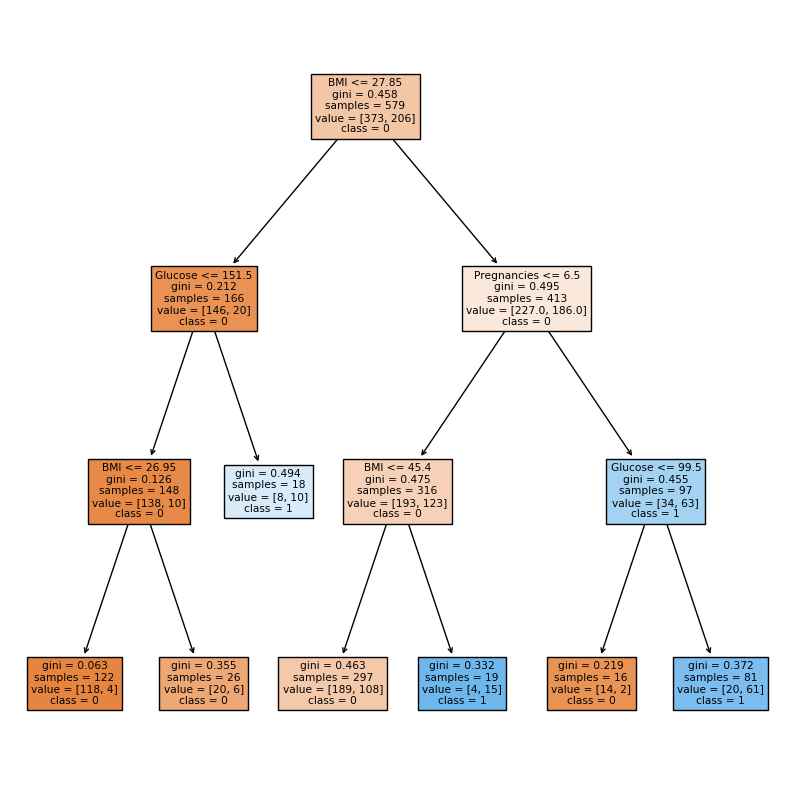

In [15]:
fig = plt.figure(figsize=(10, 10))

tree.plot_tree(s_tree, feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()

Optimización del modelo

In [16]:
hyperparams = {
    "criterion": ["gini", "entropy"],                # Funciones de criterio para medir la calidad de una división
    "splitter": ["best", "random"],                  # La estrategia utilizada para elegir la división en cada nodo
    "max_depth": [2, 5, 10, 20, 30, 50],             # La profundidad máxima del árbol
    "min_samples_split": [2, 6, 10, 14, 18, 20],     # Número mínimo de muestras requeridas para dividir un nodo interno
    "min_samples_leaf": [1, 2, 3, 4, 5]              # Número mínimo de muestras requeridas para ser un nodo hoja
}

# Búsqueda en cuadrícula con validación cruzada
grid = GridSearchCV(s_tree, hyperparams, scoring = "accuracy", cv = 10)   # métrica de evaluación (scoring - "accuracy" para maximizar la precisión) 
grid                                                                           # nº de divisiones de validación cruzada (cv, que se establece en 10).


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=3, max_features=3,
                                              min_samples_leaf=10,
                                              random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10, 20, 30, 50],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 6, 10, 14, 18, 20],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [17]:
grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 14, 'splitter': 'best'}


In [18]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_leaf = 5, min_samples_split = 14, splitter = 'best')
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       min_samples_split=14)

In [19]:
m_train_pred = model.predict(X_train)
m_test_pred = model.predict(X_test)
get_metrics(y_train, y_test, m_train_pred, m_test_pred)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.823834,0.732984,0.791548,0.795455,0.679612,0.903485
Test,0.800000,0.666667,0.763680,0.659091,0.674419,0.852941
Diferencia,0.023834,0.066318,0.027869,0.136364,0.005193,0.050544


In [20]:
confusion_matrix(y_test, m_test_pred)

array([[87, 15],
       [14, 29]])

La matriz de confusión proporciona una visión detallada del rendimiento del modelo al clasificar las instancias en cada una de las clases. Aquí tienes la interpretación de la matriz de confusión proporcionada:

Verdaderos positivos (TP): 87 instancias fueron correctamente clasificadas como positivas (clase 1).
Falsos negativos (FN): 15 instancias fueron incorrectamente clasificadas como negativas cuando en realidad son positivas.
Falsos positivos (FP): 14 instancias fueron incorrectamente clasificadas como positivas cuando en realidad son negativas.
Verdaderos negativos (TN): 29 instancias fueron correctamente clasificadas como negativas (clase 0).
En resumen, el modelo tiene un buen rendimiento al clasificar instancias negativas (clase 0), con un alto número de verdaderos negativos (TN), pero tiene más dificultades al clasificar instancias positivas (clase 1), con un equilibrio menos favorable entre verdaderos positivos (TP) y falsos negativos (FN).

In [21]:
dump(model, open("../models/tree_classifier_simple_crit-entro_maxdepth-5_minleaf-5_minsplit2_14.sav", "wb"))

In [27]:
def custom_transform(X):
    return X

steps = [
    ('custom_transform', FunctionTransformer(func=custom_transform)),
    ('model', model)  # Modelo de árbol de decisión optimizado
]

In [28]:
pipeline = Pipeline(steps)

In [32]:
# Guardar el pipeline
joblib.dump(pipeline, "../models/pipeline_decision_tree_optimized.sav")

['../models/pipeline_decision_tree_optimized.sav']

In [33]:
pipeline = joblib.load('pipeline_decision_tree_optimized.sav')

FileNotFoundError: [Errno 2] No such file or directory: 'pipeline_decision_tree_optimized.sav'

In [ ]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age']

pred_house_data =pd.DataFrame([[3, 100, 66, 35, 0,673, 45]], columns=cols)

predicciones = pipeline.predict(pred_house_data)

In [ ]:
if predicciones == 0:
    print("No tiene diabetes")
elif predicciones == 1:
    print("Tiene diabetes")